### This notebook is used to construct oriented fake point cloud data

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
"""
method skeleton at https://stackoverflow.com/questions/38727520/adding-default-parameter-value-with-type-hint-in-python
"""
def construct_sphere_pcd(radius: int = 1, origin: np.ndarray = np.zeros(3), num_sample: int = 5000) -> np.ndarray:
    phi = np.random.uniform(0, 2 * np.pi, num_sample)
    cos_theta = np.random.uniform(-1, 1, num_sample)
    theta = np.arccos(cos_theta)

    sin_theta = np.sin(theta)
    x = radius * sin_theta * np.cos(phi)
    y = radius * sin_theta * np.sin(phi)
    z = radius * cos_theta

    pcd = np.transpose([x, y, z])
    # computing the unit vertex normal
    norm = pcd / np.linalg.norm(pcd, axis=1).reshape((-1, 1))

    return np.hstack([pcd + origin, norm])


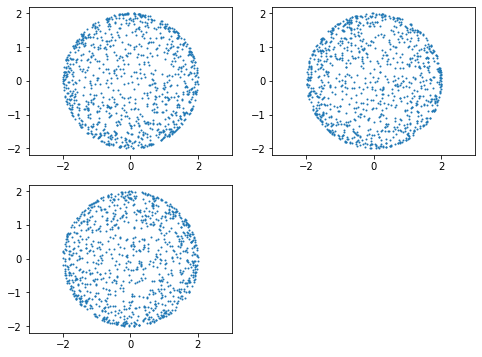

In [61]:
# easy way to visualize the sphere without needing additional python packages
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.axis('equal')
plt.scatter(pcd[:,0], pcd[:,1], s=1)

plt.subplot(2, 2, 2)
plt.axis('equal')
plt.scatter(pcd[:,1], pcd[:,2], s=1)

plt.subplot(2, 2, 3)
plt.axis('equal')
plt.scatter(pcd[:,2], pcd[:,0], s=1)